# Mastering Image Classification: A Beginner's Guide to Computer Vision

This Notebook includes the code that was used in the Image Classification tutorial. You can use this notebook as a base to follow the tutorial more easily or to start your own image classification project. 

Created by: Rebecca Borski

Library requirements:
- TensorFlow
- Matplotlib
- tensorflow_datasets
- numpy
- seaborn
- tf_explain

In [1]:
import tensorflow as tf

## Load the data
### Load data from TensorFlow datasets

In [2]:
import tensorflow_datasets as tfds

(train_dataset, test_dataset, validation_dataset), metadata = tfds.load(
    'tf_flowers', #change the name to your dataset
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
    shuffle_files=True
)

#### Extracting the classes

In [3]:
class_names = metadata.features['label'].names

In [4]:
num_classes = metadata.features['label'].num_classes

#### Visualize the dataset

In [5]:
index = 42  # Index of the image-label pair you want to extract
train_list = list(train_dataset) 
image, label = train_list[index]

Text(0.5, 1.0, 'dandelion')

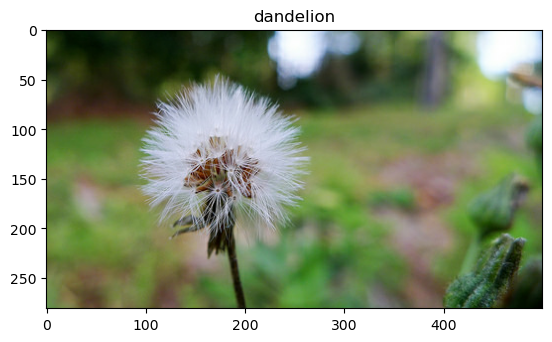

In [6]:
import matplotlib.pyplot as plt

# plot the extracted image and its label
plt.imshow(image)
plt.title(class_names[label])

## Preprocess the data

In [7]:
img_height = 128
img_width = 128

In [8]:
def preprocess_image(image, label):
    # Resize images to desired dimensions
    image = tf.image.resize(image, (img_height, img_width))
    # Add more augmentation techniques as needed
    image = tf.image.random_flip_left_right(image)
    return image, label

### Applying the preprocessing

In [9]:
train_dataset = train_dataset.map(preprocess_image)
validation_dataset = test_dataset.map(preprocess_image)

In [10]:
# Resize the images in the test dataset
test_dataset = test_dataset.map(lambda image, label: (tf.image.resize(image, (img_height, img_width)), label))

In [11]:
batch_size = 32 # standard batch size

# Batch the datasets
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

## Building your first model

### Setting up the CNN architecture

In [12]:
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Rescaling(1./255), # normalization 
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


### Compile the model

In [13]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


### Training the model

In [14]:
# Train the model
epochs = 10

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs, 
)

Epoch 1/10


92/92 [==============================] - 11s 104ms/step - loss: 1.3649 - accuracy: 0.4057 - val_loss: 1.1144 - val_accuracy: 0.4905
Epoch 2/10
92/92 [==============================] - 9s 96ms/step - loss: 1.0534 - accuracy: 0.5855 - val_loss: 1.0068 - val_accuracy: 0.6240
Epoch 3/10
92/92 [==============================] - 9s 95ms/step - loss: 0.9149 - accuracy: 0.6553 - val_loss: 0.9342 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 9s 97ms/step - loss: 0.8224 - accuracy: 0.6962 - val_loss: 0.8874 - val_accuracy: 0.6621
Epoch 5/10
92/92 [==============================] - 9s 96ms/step - loss: 0.7516 - accuracy: 0.7217 - val_loss: 0.8740 - val_accuracy: 0.6649
Epoch 6/10
92/92 [==============================] - 9s 97ms/step - loss: 0.6849 - accuracy: 0.7469 - val_loss: 0.9015 - val_accuracy: 0.6458
Epoch 7/10
92/92 [==============================] - 9s 97ms/step - loss: 0.5983 - accuracy: 0.7834 - val_loss: 0.8957 - val_accuracy: 0.6540
Epoch 8/10
92/92 [====

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

## Evaluating and improving the model

### Evaluating the accuracy

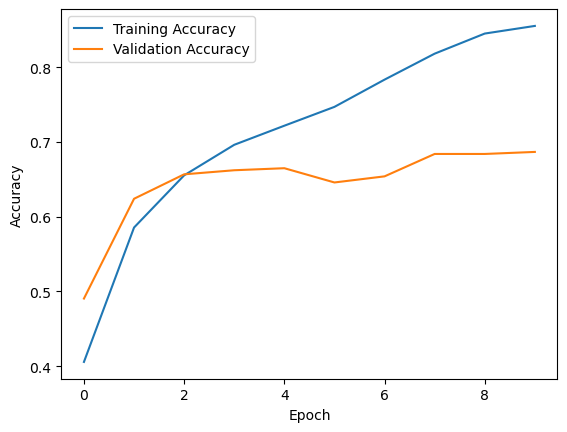

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Evaluating the loss

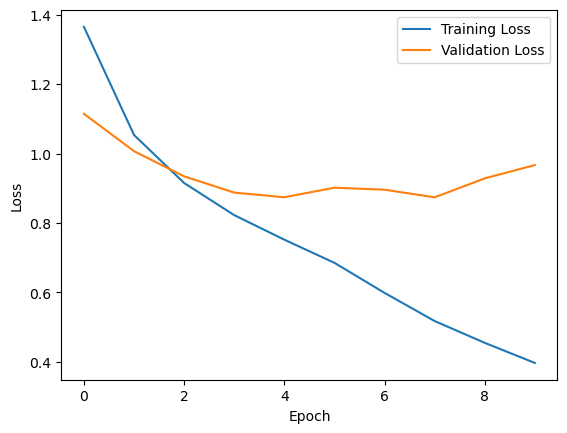

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Improving the model

#### Adjust the model architecture

In [18]:
# Define the model architecture with dropout layers and L2 regularization
improved_model = tf.keras.Sequential([
    layers.Rescaling(1./255), # normalization 
    layers.Conv2D(16, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),  # Adding dropout layer with dropout rate of 0.2
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),  # Adding dropout layer with dropout rate of 0.2
    layers.Dense(num_classes)  
]) 


#### Adding a learning rate

In [19]:
# Define the learning rate
learning_rate = 0.001  

# initialize the optimizer with a learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with a specified learning rate
improved_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### Add early stopping

In [20]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights to the ones that achieved the best validation loss
)

In [21]:
# Train the model with early stopping
improved_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping]  # Pass EarlyStopping callback to the callbacks parameter
)

Epoch 1/100


92/92 [==============================] - 12s 108ms/step - loss: 1.4785 - accuracy: 0.4591 - val_loss: 1.2266 - val_accuracy: 0.6158
Epoch 2/100
92/92 [==============================] - 9s 101ms/step - loss: 1.2031 - accuracy: 0.5923 - val_loss: 1.1193 - val_accuracy: 0.6376
Epoch 3/100
92/92 [==============================] - 10s 106ms/step - loss: 1.0967 - accuracy: 0.6390 - val_loss: 1.0390 - val_accuracy: 0.6567
Epoch 4/100
92/92 [==============================] - 10s 110ms/step - loss: 1.0275 - accuracy: 0.6672 - val_loss: 1.0380 - val_accuracy: 0.6649
Epoch 5/100
92/92 [==============================] - 10s 104ms/step - loss: 0.9690 - accuracy: 0.6965 - val_loss: 1.0052 - val_accuracy: 0.6703
Epoch 6/100
92/92 [==============================] - 10s 105ms/step - loss: 0.9441 - accuracy: 0.7129 - val_loss: 0.9686 - val_accuracy: 0.7084
Epoch 7/100
92/92 [==============================] - 10s 105ms/step - loss: 0.8867 - accuracy: 0.7326 - val_loss: 0.9365 - val_accuracy: 0.7221
Epoch

#### Prepare the error analysis

In [22]:
import numpy as np
import seaborn as sns

In [23]:
# Initialize empty lists to store true labels, predicted classes, prediction probabilities, and images
true_labels = []
predicted_classes = []
prediction_probabilities = []
images_list = []

# Iterate through the validation dataset to collect true labels, predictions, prediction probabilities, and images
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))
    prediction_probabilities.extend(np.max(predictions, axis=1))
    images_list.extend(images.numpy())


1/1 [==============================] - 0s 108ms/step


In [24]:
# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_classes = np.array(predicted_classes)
prediction_probabilities = np.array(prediction_probabilities)
images_list = np.array(images_list)


#### create a confusion matrix

In [25]:
# Generate confusion matrix
conf_matrix = tf.math.confusion_matrix(true_labels, predicted_classes)


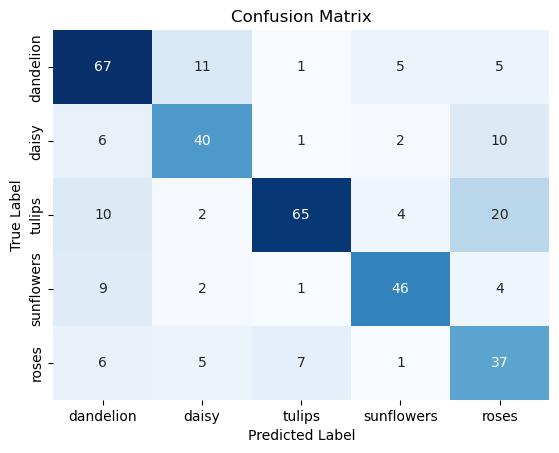

In [26]:
# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### Plotting the worst predictions

In [27]:
# Function to scale image pixel values to [0, 1]
def scale_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    scaled_image = (image - min_val) / (max_val - min_val)
    return scaled_image

In [28]:
selected_class = 4

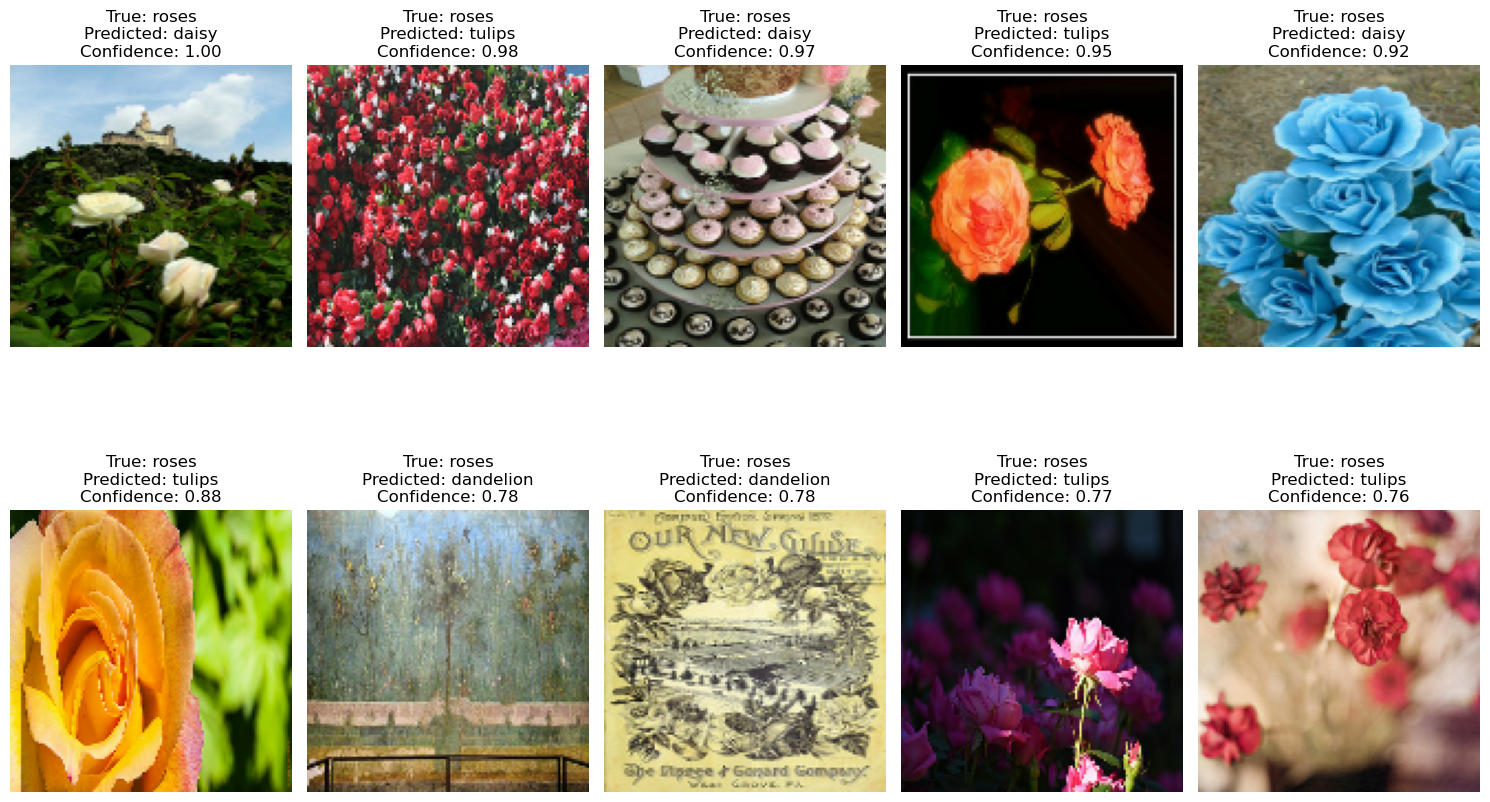

In [29]:
plt.figure(figsize=(15, 10))

# Find indices of images that are not the selected_class
wrong_predictions = np.where((true_labels == selected_class) & (predicted_classes != selected_class))[0]

# Filter for 10 wrong predictions with the highest confidence
wrong_predictions = wrong_predictions[np.argsort(prediction_probabilities[wrong_predictions])[::-1][:10]]

# Plot the selected images
for subplot_index, idx in enumerate(wrong_predictions):
    plt.subplot(2, 5, subplot_index + 1)
    # Scale pixel values of the image to [0, 1]
    scaled_image = scale_image(images_list[idx])
    plt.imshow(scaled_image)
    plt.title(f"True: {class_names[selected_class]}\nPredicted: {class_names[predicted_classes[idx]]}\nConfidence: {prediction_probabilities[idx]:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Explainable AI (XAI)

### Grad-CAM

In [30]:
from tf_explain.core.grad_cam import GradCAM

In [31]:
# Create GradCAM explainer
explainer = GradCAM()

In [32]:
# Choose 3 random indices from the dataset
random_indices = np.random.choice(len(test_dataset), 3, replace=False)

1/1 [==============================] - 0s 39ms/step


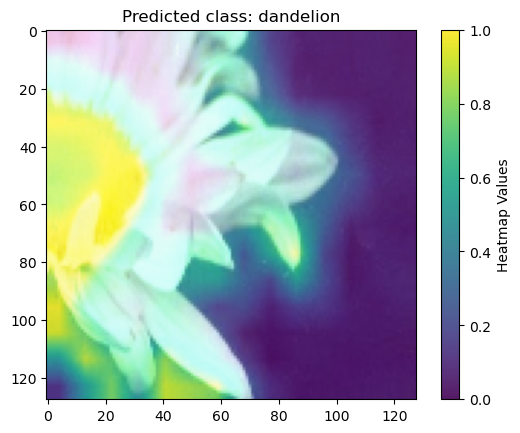

1/1 [==============================] - 0s 51ms/step


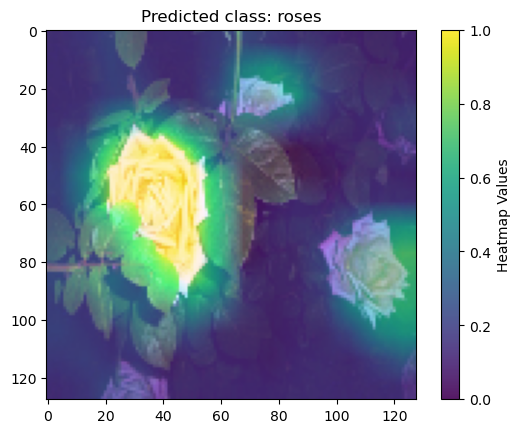

1/1 [==============================] - 0s 45ms/step


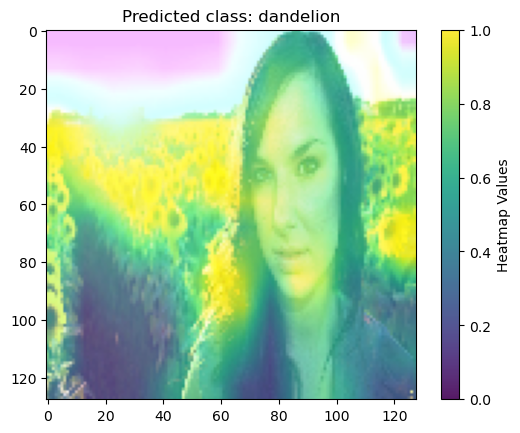

In [33]:
# Iterate over each random image index
for image_index in random_indices:
    # Retrieve the image and corresponding label
    image, label = list(test_dataset.take(1))[0]

    # Choose the class index you want to explain
    class_index = np.argmax(model.predict(image), axis=1)[image_index]
    
    # Convert the input image from TensorFlow tensor to Numpy array
    image_np = image[image_index].numpy()

    # Scale the image pixel values to [0, 1]
    image_np = scale_image(image_np)

    # Add a batch dimension to the input image
    image_np_batch = np.expand_dims(image_np, axis=0)

    # Compute Grad-CAM heatmap
    gradcam = explainer.explain((image_np_batch, None), model, class_index)

    # Plot the input image 
    plt.imshow(image_np, cmap='gray', vmin=0, vmax=1)

    # Show the heatmap overlay on the input image
    im = plt.imshow(gradcam.squeeze(), alpha=0.9, vmin=0, vmax=1)

    plt.title(f'Predicted class: {class_names[class_index]}')

    # Add color bar to the plot
    cbar = plt.colorbar(im)
    cbar.set_label('Heatmap Values')

    plt.show()
